In [1]:
import os
import numpy as np
import pandas as pd
from collections import Counter
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg19 import (
    VGG19, 
    preprocess_input, 
    decode_predictions
)

In [2]:
# dimensions of our images.
img_width, img_height = 100, 100

train_data_dir = 'data/fruits-360/Training'
test_data_dir = 'data/fruits-360/Test'
nb_train_samples = 67692
nb_test_samples = 22688
epochs = 50
batch_size = 16

In [3]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [18]:
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [19]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
# model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(131, activation='softmax'))
# model.add(Activation('softmax'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)             

In [21]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [10]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [11]:
# this is the augmentation configuration we will use for testing:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 67692 images belonging to 131 classes.


In [13]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 22688 images belonging to 131 classes.


In [22]:
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=nb_test_samples // batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 4230 steps, validate for 1418 steps
Epoch 1/50
4230/4230 [==============================] - 460s 109ms/step - loss: 1.4478 - accuracy: 0.5834 - val_loss: 0.4723 - val_accuracy: 0.8616
Epoch 2/50
4230/4230 [==============================] - 454s 107ms/step - loss: 0.5415 - accuracy: 0.8174 - val_loss: 0.2813 - val_accuracy: 0.9333
Epoch 3/50
4230/4230 [==============================] - 450s 106ms/step - loss: 0.4026 - accuracy: 0.8635 - val_loss: 0.2601 - val_accuracy: 0.9402
Epoch 4/50
4230/4230 [==============================] - 449s 106ms/step - loss: 0.3284 - accuracy: 0.8901 - val_loss: 0.2462 - val_accuracy: 0.9527
Epoch 5/50
4230/4230 [==============================] - 450s 106ms/step - loss: 0.2911 - accuracy: 0.9017 - val_loss: 0.2141 - val_accuracy: 0.9601
Epoch 6/50
4230/4230 [==============================] - 445s 105ms/step - loss: 0.2564 - accuracy: 0.9137 - val_loss: 0.1931 - val_accuracy: 0.9577
Epoch 7/50
4230/

In [23]:
model.save("CNN8_3-2.h5")

In [24]:
def predict(image_path, N):
    """Use VGG19 to label image"""
    img = image.load_img(image_path, target_size=(100, 100))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x/255
    predictions = model.predict(x)
    
#     classes = np.argpartition(predictions[0], -N)
    classes = np.flip(np.argsort(predictions[0])[-N:])
#     print(np.argpartition(predictions[0], -N))
#     print(predictions[0][[2,5,8]])
#     print(classes)
    prob = predictions[0][classes]
    prob = [f'{x*100: .3f}%' for x in prob]
#     print(prob)
    labels = list(test_generator.class_indices.keys())
    L = [labels[x] for x in classes]
#     print(labels)
#     classes = int(model.predict_classes(x))
#     target = np.argmax(predictions[0])
    plt.imshow(img)
    print('Predicted:', list(zip(L, prob)))
#     print(predictions)

Predicted: [('Cherry 1', ' 100.000%'), ('Watermelon', ' 0.000%'), ('Grape White 2', ' 0.000%')]


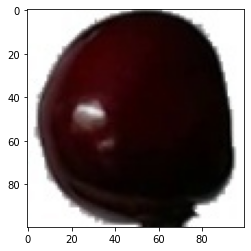

In [25]:
predict('data/fruits-360/Test/Cherry 1/r_7_100.jpg', 3)

Predicted: [('Kumquats', ' 99.496%'), ('Apple Red Yellow 1', ' 0.502%'), ('Nectarine', ' 0.002%')]


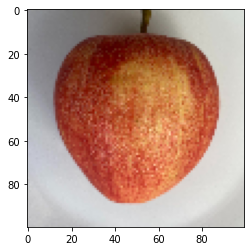

In [26]:
predict('Pictures/gala_apple.jpg', 3)

Predicted: [('Strawberry', ' 94.817%'), ('Watermelon', ' 5.178%'), ('Plum', ' 0.005%')]


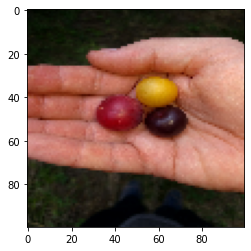

In [27]:
predict('data/fruits-360/test-multiple_fruits/cherries_wax7.jpg', 3)

In [ ]:
model.history()

In [28]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
train_generator.labels

In [ ]:
Counter(train_generator.labels).values()

In [ ]:
Counter(train_generator.labels).keys()

In [ ]:
plt.figure(figsize=(20,3))
plt.margins(x = .005)
plt.bar(Counter(train_generator.labels).keys(), Counter(train_generator.labels).values(), color='green')
plt.xlabel("Index")
plt.ylabel("Image Count")
plt.title("Count of Images per Class")
plt.show()

In [ ]:
test_keys = list(test_generator.class_indices.keys())
test_values = list(Counter(train_generator.labels).values())
explain = {test_keys[i]: [f"Index: {i}", f"Count: {test_values[i]}"] for i in range(len(test_keys))}
explain

In [30]:
acc = history.history['accuracy']
loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

In [31]:
#We wont need this since we can pull the data straight from the cell above

with open('model_metrics/accuracy.txt', 'w') as filehandle:
    for listitem in acc:
        filehandle.write('%s\n' % listitem)
with open('model_metrics/loss.txt', 'w') as filehandle:
    for listitem in loss:
        filehandle.write('%s\n' % listitem)
with open('model_metrics/test_accuracy.txt', 'w') as filehandle:
    for listitem in test_acc:
        filehandle.write('%s\n' % listitem)
with open('model_metrics/test_loss.txt', 'w') as filehandle:
    for listitem in test_loss:
        filehandle.write('%s\n' % listitem)

In [34]:
#This just pulls in the files. We wont need to write it to txt 
#or do the below if we are getting it straight from the history object

text_file = open("model_metrics/accuracy.txt", "r")
acc = text_file.read().split('\n')
text_file = open("model_metrics/loss.txt", "r")
loss = text_file.read().split('\n')
text_file = open("model_metrics/test_accuracy.txt", "r")
test_acc = text_file.read().split('\n')
text_file = open("model_metrics/test_loss.txt", "r")
test_loss = text_file.read().split('\n')


#We will need to pop off the last empty element and convert 
#the numbers from there string data type to floats

acc.pop()
acc = np.array(acc)
acc = acc.astype(np.float)

loss.pop()
loss = np.array(loss)
loss = loss.astype(np.float)

test_acc.pop()
test_acc = np.array(test_acc)
test_acc = test_acc.astype(np.float)

test_loss.pop()
test_loss = np.array(test_loss)
test_loss = test_loss.astype(np.float)
    

In [35]:
#Get array of Epoch Numbers for X axis
epochs = []
for i in range (1,51):
    epochs.append(i)

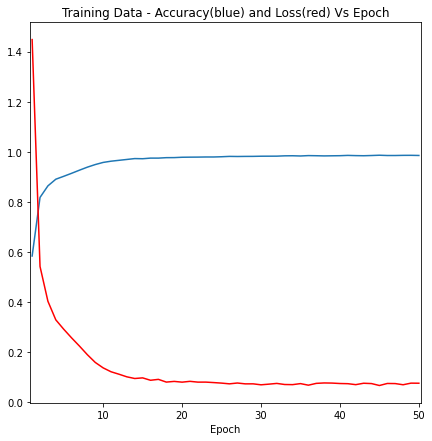

In [36]:
#Train Accuracy and Loss VS epoch
plt.figure(figsize=(7,7))
plt.margins(x = .005)
plt.plot(epochs, acc)
plt.plot(epochs, loss, color = 'r')
plt.xlabel("Epoch")
plt.title("Training Data - Accuracy(blue) and Loss(red) Vs Epoch")
plt.show()

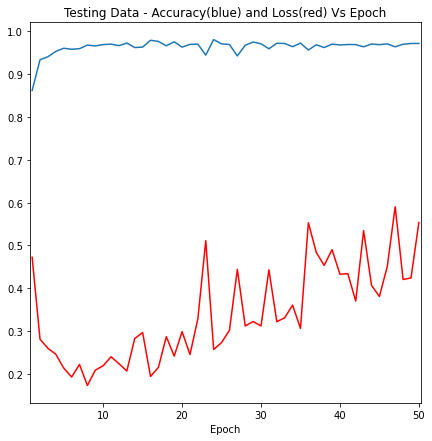

In [40]:
#Test Accuracy and Loss VS epoch
plt.figure(figsize=(7,7))
plt.margins(x = .005)
plt.plot(epochs, test_acc)
plt.plot(epochs, test_loss, color = 'r')
plt.xlabel("Epoch")
plt.title("Testing Data - Accuracy(blue) and Loss(red) Vs Epoch")
plt.show()